**310D: Data Curation and analysis**

**Sreehana Mandava**

For this project, I wanted to analyze the trajectory of streams of songs by the artist Taylor Swift over time. TO do this, I went online to find a website that contains a html table with this information. I found a website called kworbs (link: https://kworb.net/spotify/artist/06HL4z0CvFAxyc27GXpf02.html) that had to data that I needed.

After I identified the table, I started with my code. I first installed a library called BeautifulSoup which would let me perform web scraping. I also imported pandas and requests to help me create tables and perform http requests respectively.

Then, I identified the url of the website which contains the table and also identifies the class of the table so that it would be easier for python to find the table within the website.

Finally, I printed the dataframe.

> Indented block



In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

website_url="https://kworb.net/spotify/artist/06HL4z0CvFAxyc27GXpf02.html"
table_class="sortable"
response= requests.get(website_url)
soup= BeautifulSoup(response.text, 'html.parser')

TS_Songs = soup.find('table', attrs={'class': table_class})



df=pd.read_html(str(TS_Songs))
df=pd.DataFrame(df[0])

df

,Peak Date,Title,Streams,Global,US,PH,GB,AU,CA,ID,...,LU,EG,CY,MT,RU,MA,UA,KZ,NG,AD
0,2022/10/21,Anti-Hero,1154230220,1,1,1,1,1,1,6,...,5,29,6,--,--,62,97,115,148,--
1,2023/08/10,Blank Space,896822292,30,34,28,34,10,35,95,...,154,--,165,--,--,--,--,--,--,--
2,2023/09/01,Cruel Summer,807099096,2,2,1,3,2,3,9,...,16,82,24,68,--,198,--,194,--,--
3,2017/02/17,* I Donât Wanna Live Forever (Fifty Shades D...,689703049,2,3,4,7,2,2,4,...,2,--,2,2,--,--,--,--,--,3
4,2023/08/11,Donât Blame Me,545676141,72,54,51,38,25,46,--,...,78,--,111,--,--,--,--,164,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020/05/19,Cornelia Street - Live From Paris,24847,--,--,167,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
235,2019/11/16,Beautiful Ghosts,20171,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
236,2015/11/22,Safe & Sound,16818,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
237,2015/01/11,Safe & Sound - from The Hunger Games Soundtrack,13953,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


**Transformation**

For the purpose of this project, I was only interested in the attributes that contained information reagarding the peak date of the song, the title of the song, the number of streams, the global ranking and the US ranking. Hence, I used the following code to select these specific attributes.

In [2]:
df_filtered=df[["Peak Date", "Title", "Streams", "Global", "US"]]
df_filtered

,Peak Date,Title,Streams,Global,US
0,2022/10/21,Anti-Hero,1154230220,1,1
1,2023/08/10,Blank Space,896822292,30,34
2,2023/09/01,Cruel Summer,807099096,2,2
3,2017/02/17,* I Donât Wanna Live Forever (Fifty Shades D...,689703049,2,3
4,2023/08/11,Donât Blame Me,545676141,72,54
...,...,...,...,...,...
234,2020/05/19,Cornelia Street - Live From Paris,24847,--,--
235,2019/11/16,Beautiful Ghosts,20171,--,--
236,2015/11/22,Safe & Sound,16818,--,--
237,2015/01/11,Safe & Sound - from The Hunger Games Soundtrack,13953,--,--


Once I was able to extract the table that I wanted with the required attributes, I downloaded it as a csv file with the following code.

In [3]:
df_filtered.to_csv("TS_Data.csv")

**Analysis: Summary and visualizations**

I would like to analyse the trend of streams of the songs in regards to time/date. Here, the graph that I choose to represent the data should allow for a sequence to be represented on the x-axis and a continuous numerical variable to be represented on the y-axis. This visualization can be done with a line graph. Hence, I am going to structure the data as a line graph.

Text(0.5, 1.0, 'Trend of number of streams of Taylor Swift songs over time on the date that they peaked')

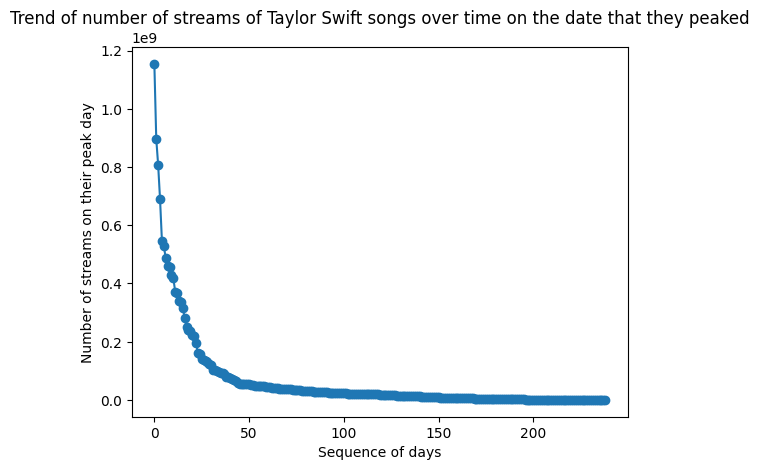

In [4]:
from matplotlib import pyplot as plt
date=df_filtered["Peak Date"]
date_ids = range(len(date))
streams_column = df_filtered["Streams"]

plt.plot( date_ids, streams_column, marker='o')

plt.xlabel("Sequence of days")
plt.ylabel("Number of streams on their peak day")

plt.title("Trend of number of streams of Taylor Swift songs over time on the date that they peaked")

**Interpretation**

On the x-axis, we can see our independent variable, the sequence of days from the start date, and on the y-axis, we can see the dependent variable number of streams on their peak day. From this line graph we can clearly see that the number of streams of the song on the date of the peak was high at the beginning, and then had a steep decrease. Then, the streams had a steady number over time, as we can see the overlap of datapoints. This indicates to us that the trend line between the datapoints shows to be negative exponential decline, where the number of streams decrease over a period of time.  